# Step 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Swap for any model
from sklearn.metrics import mean_squared_error, r2_score  # Replace for classification

# Step 2: Load Dataset

In [4]:
file_path = "../data/processed/clean_telco.csv"
df = pd.read_csv(file_path)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.280248,-1.161694,-0.994194,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,0.064303,-0.260878,-0.173740,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.239504,-0.363923,-0.959649,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.512486,-0.747850,-0.195248,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.239504,0.196178,-0.940457,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Step 3.0: Define Features (X) and Target (y)
# Choose input features and output label

In [5]:
selected_features = [
    'tenure',                   
    'TotalCharges',              
    'Contract_One year',         
    'Contract_Two year',         
    'InternetService_Fiber optic',  
    'InternetService_No',           
    'PaymentMethod_Electronic check', 
    'SeniorCitizen'             
]

X = df[selected_features]        
y = df['MonthlyCharges']         

# Step 3.1 - Test

In [7]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (7032, 8)
Shape of y: (7032,)


# STEP 4.0: Split - randomly split your data into train/test parts

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 4.1 Previewing Train/Test Split – Real Examples of the outcome of STEP 4.0
# View the first few rows of X_train and y_train
# This lets us verify that the features/columns and targets align correctly and are ready for model training

In [9]:
print("🔹 X_train sample:")
print(X_train.head())

print("\n🔹 y_train sample:")
print(y_train.head())

# Check X_test and y_test as well
print("\n🔸 X_test sample:")
print(X_test.head())

print("\n🔸 y_test sample:")
print(y_test.head())

🔹 X_train sample:
        tenure  TotalCharges  Contract_One year  Contract_Two year  \
6021  0.430998     -0.091370              False              False   
3404 -1.198760     -0.924111              False              False   
5474  0.919926      0.959516              False              False   
5515  0.512486      0.119297              False               True   
6328  0.919926      1.396490               True              False   

      InternetService_Fiber optic  InternetService_No  \
6021                        False               False   
3404                        False               False   
5474                         True               False   
5515                        False               False   
6328                         True               False   

      PaymentMethod_Electronic check  SeniorCitizen  
6021                           False              0  
3404                           False              0  
5474                            True              0  
55

# Step 5.0: Train the Model
# Replace LinearRegression() with any model (e.g., LogisticRegression)

In [10]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

# Step 5.1 - test/inspect the learned weights. These weights tell you how each feature affects the predicted MonthlyCharges

In [19]:
print("Intercept (θ₀):", model.intercept_)
print("Coefficients (θ₁...θₙ):")
for name, coef in zip(X_train.columns, model.coef_):
    print(f"  {name:30s}: {coef:.4f}")

Intercept (θ₀): -0.25504244330650644
Coefficients (θ₁...θₙ):
  tenure                        : -0.2591
  TotalCharges                  : 0.5355
  Contract_One year             : 0.0884
  Contract_Two year             : 0.1633
  InternetService_Fiber optic   : 0.8744
  InternetService_No            : -0.9280
  PaymentMethod_Electronic check: 0.0469
  SeniorCitizen                 : -0.0114


# STEP 5.2. visualize the above learned weights (coefficients) in a chart, for example, bar chart.

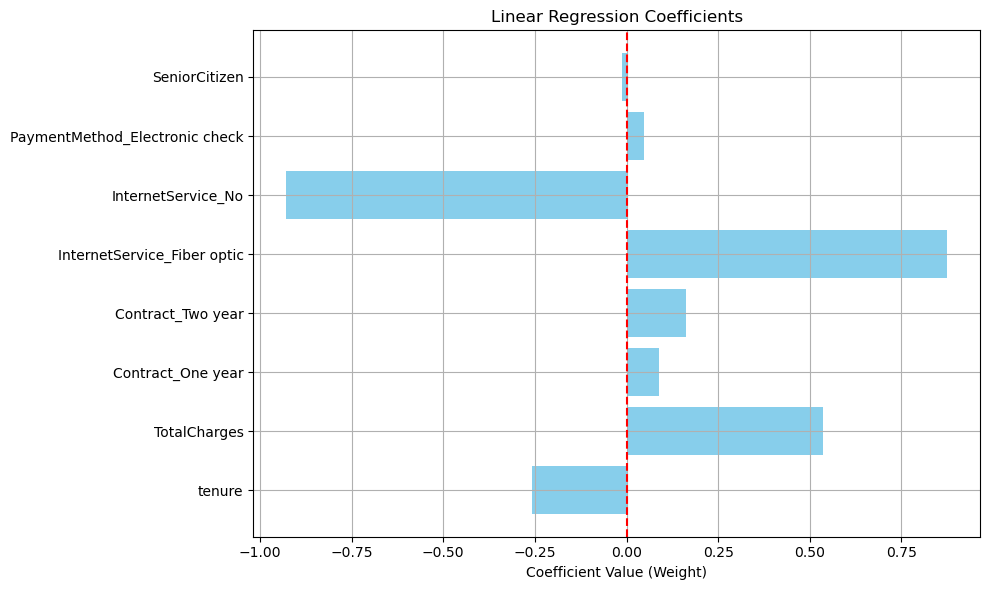

In [21]:
# Get feature names and corresponding coefficients
feature_names = X_train.columns
coefficients = model.coef_

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Coefficient Value (Weight)")
plt.title("Linear Regression Coefficients")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Predict and Visualize (Regression Example)
# Optionally, Create the folder if it doesn't exist and then save the plot to a file (for reports):

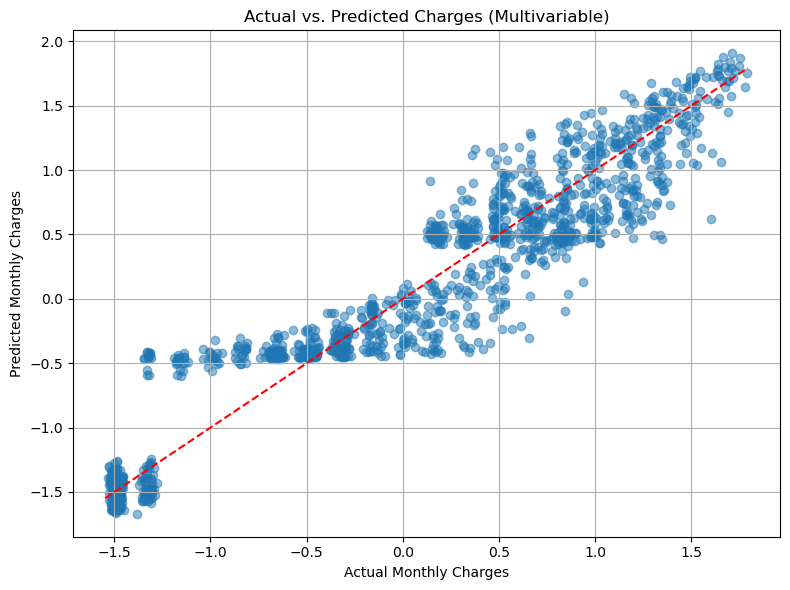

In [22]:
# Create folders if needed
import os
os.makedirs("../reports/figures", exist_ok=True)

# Generate plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Monthly Charges")
plt.ylabel("Predicted Monthly Charges")
plt.title("Actual vs. Predicted Charges (Multivariable)")
plt.grid(True)
plt.tight_layout()

# Save BEFORE showing
plt.savefig("../reports/figures/actual_vs_predicted.png")

# Then show it
plt.show()


# Step 7: Evaluate Model Performance (Regression Metrics)

In [24]:
# 🟦 Step 7: Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

# Ensure predictions exist
y_pred = model.predict(X_test)

# Print model intercept and coefficients
print("🔹 Model Parameters") 
print(f"Intercept (θ₀): {model.intercept_:.4f}")
print("Coefficients (θ₁…θₙ):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  • {feature:30s} → {coef:.4f}")

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("\n📊 Evaluation Metrics")
print(f"Mean Squared Error (MSE):     {mse:.2f}")
print(f"R² Score (Variance Explained): {r2:.4f}")

🔹 Model Parameters
Intercept (θ₀): -0.2550
Coefficients (θ₁…θₙ):
  • tenure                         → -0.2591
  • TotalCharges                   → 0.5355
  • Contract_One year              → 0.0884
  • Contract_Two year              → 0.1633
  • InternetService_Fiber optic    → 0.8744
  • InternetService_No             → -0.9280
  • PaymentMethod_Electronic check → 0.0469
  • SeniorCitizen                  → -0.0114

📊 Evaluation Metrics
Mean Squared Error (MSE):     0.09
R² Score (Variance Explained): 0.9116


# Step 8: Verify & Diagnose the Model
# Typical Verification Actions
# 1. Plot Residuals

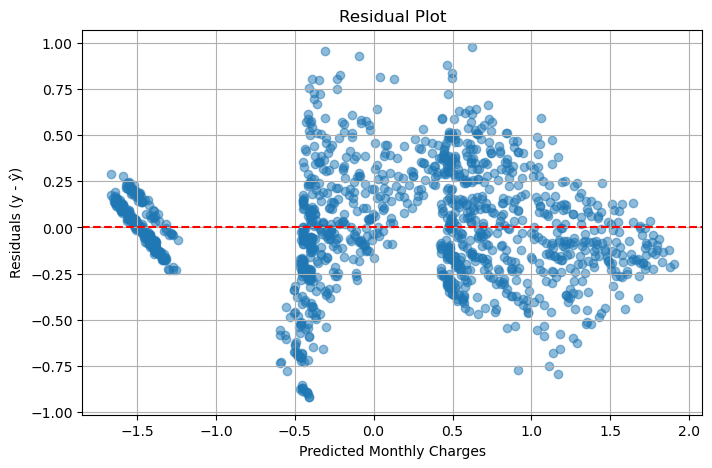

In [25]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Monthly Charges")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


# 2. Check for Multicollinearity

<Axes: >

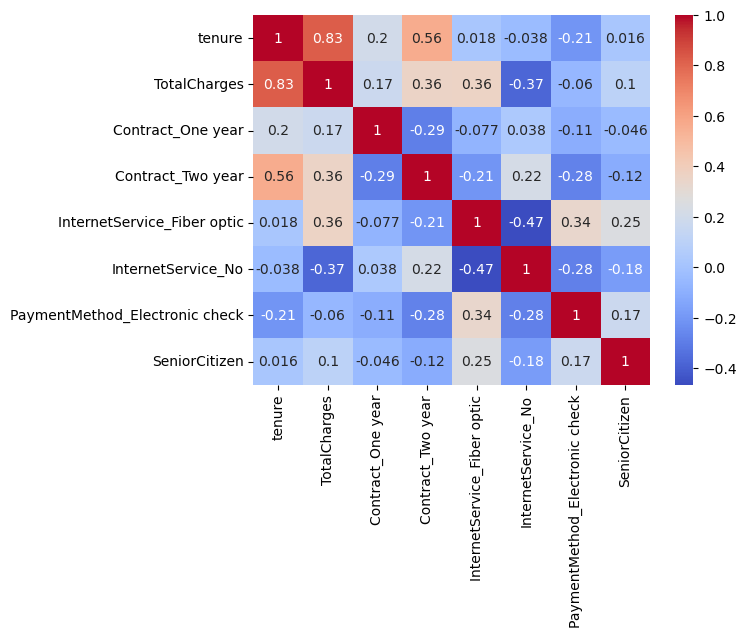

In [28]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Step 9.0.1 Tune the Model with Regularization (Ridge Regression)

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train a Ridge Regression Model
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)


Ridge()

# 9.0.2 Predict & Evaluate

In [30]:
y_ridge_pred = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print(f"📊 Ridge MSE: {mse_ridge:.2f}")
print(f"📈 Ridge R²: {r2_ridge:.4f}")


📊 Ridge MSE: 0.09
📈 Ridge R²: 0.9116


# 9.0.3 Compare Coefficients to Ordinary Linear Regression

In [31]:
print("Ridge Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"  • {feature:30s} → {coef:.4f}")


Ridge Coefficients:
  • tenure                         → -0.2589
  • TotalCharges                   → 0.5358
  • Contract_One year              → 0.0876
  • Contract_Two year              → 0.1620
  • InternetService_Fiber optic    → 0.8736
  • InternetService_No             → -0.9268
  • PaymentMethod_Electronic check → 0.0471
  • SeniorCitizen                  → -0.0112


# Step 9.0.4: Apply Lasso Regression (L1 Regularization)

In [33]:
from sklearn.linear_model import Lasso

# Train a Lasso Regression Model
lasso_model = Lasso(alpha=0.1)   # You can try different alphas like 0.01, 1.0
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

# 9.0.5 Predict & Evaluate

In [37]:
y_lasso_pred = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print(f"Lasso MSE: {mse_lasso:.2f}")
print(f"Lasso R²: {r2_lasso:.4f}")


Lasso MSE: 0.16
Lasso R²: 0.8329


# 9.0.5 Compare Coefficients to Ordinary Linear Regression

In [38]:
print("Ridge Coefficients:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"  • {feature:30s} → {coef:.4f}")


Ridge Coefficients:
  • tenure                         → -0.2589
  • TotalCharges                   → 0.5358
  • Contract_One year              → 0.0876
  • Contract_Two year              → 0.1620
  • InternetService_Fiber optic    → 0.8736
  • InternetService_No             → -0.9268
  • PaymentMethod_Electronic check → 0.0471
  • SeniorCitizen                  → -0.0112


# Step 9.1: Apply Lasso Regression (L1 Regularization)

In [41]:
from sklearn.linear_model import Lasso

# Step 9.2: Train a Lasso Regression Model
lasso_model = Lasso(alpha=0.1)   # You can try different alphas like 0.01, 1.0
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.1)

In [ ]:
# Step 9

In [44]:
y_lasso_pred = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print(f"Lasso MSE: {mse_lasso:.2f}")
print(f"Lasso R²: {r2_lasso:.4f}")


Lasso MSE: 0.16
Lasso R²: 0.8329
